In [47]:
import numpy as np
import pandas as pd
import nltk
import re
from bs4 import BeautifulSoup

In [48]:
# nltk.download("punkt") #if required then download
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

'''MODIFY IF REQUIRED'''
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    return text


In [49]:
'''DO NOT MODIFY THESE FUNCTIONS '''
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += len(sub) # use start += 1 to find overlapping matches

def convert(lst):
    return ' '.join(lst).split()

def BIO_conversion(sentence): 
    ind_dict = {}
    for i in tech_multi_words:
        if i in sentence:
#             ind_dict[sentence.index(i)]=i #word as val, key as index
            all_occ = list(find_all(sentence,i)) # [0, 5, 10, 15]
            for ind in all_occ:
                ind_dict[ind]=i
            
    temp_word=""
    final_word_sen=[]
    final_tag_sen = []
    start=-1
    end=-1
    for i in range(0, len(sentence)):
        if(i in range(start,end)):
            continue
        if sentence[i].isspace()==True and len(temp_word)>0:
            final_word_sen.append(temp_word)
            if temp_word in tech_list:
                final_tag_sen.append("B")
            else:
                final_tag_sen.append("O")
            temp_word=""
        else: #not space
            try: #do we have multiword at this index
                temp_word=ind_dict[i]
#                 print("****")
                start=i+1
                end=i+len(temp_word) #here tag these multiwords and update new i
                listofwords = convert([temp_word])
                f=True
                for word in listofwords:
                    final_word_sen.append(word)
                    if f:
                        final_tag_sen.append("B")
                        f=False
                    else:
                        final_tag_sen.append("I")
                temp_word=""
            except:
                if(sentence[i]!=' '):
                    temp_word+=sentence[i]
                
#     final_tag_sen.append(None) #adding blank
#     final_word_sen.append(None)#adding blank
#     print(len(sentence.split())-len(final_word_sen))
    return pd.DataFrame(list(zip(final_word_sen, final_tag_sen)),columns =['Word', 'Tag'])

In [50]:
data=pd.read_csv("../Datas/tech_sort1k.csv") #DATA PATH

manual_tag_col = 'exact_matched_patt_contextual'
text_col = 'summaries'

data=data[[manual_tag_col,text_col]]
data.head()

,exact_matched_patt_contextual,summaries
0,NaN,senior director of clinical services housing a...
1,NaN,i believe that passions are meant to be shared...
2,NaN,bill bryant is founder and chairman of bryant ...
3,NaN,undertaking a trilingual masters degree in eur...
4,NaN,career objective a role within marketing and n...


In [51]:
# REPLACING NULL VALUES with empty list - []
data[manual_tag_col] = [ [] if x is np.NaN else x for x in data[manual_tag_col] ]

In [52]:
data.head(10)

,exact_matched_patt_contextual,summaries
0,[],senior director of clinical services housing a...
1,[],i believe that passions are meant to be shared...
2,[],bill bryant is founder and chairman of bryant ...
3,[],undertaking a trilingual masters degree in eur...
4,[],career objective a role within marketing and n...
5,[],an it professional with over 14+ years of exte...
6,['republic'],i am a 19 year old entrepreneur and manager of...
7,['dell'],i am a self motivated professional with 13+ ye...
8,"['wordpress', 'joomla', 'drupal']",as owner and director of projects at metro inf...
9,['unity'],15+ years within the recruiting industry combi...


In [53]:
#checking column type
for i, l in enumerate(data[manual_tag_col]):
    print("list",i,"is",type(l))
    if(i==10):
        break

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'list'>


In [54]:
data[manual_tag_col]=data[manual_tag_col].astype(str)
#checking column type
for i, l in enumerate(data[manual_tag_col]):
    print("list",i,"is",type(l))
    if(i==10):
        break

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>


In [55]:
data[manual_tag_col] = data[manual_tag_col].apply(eval) #to convert string to list of strings
#checking column type
for i, l in enumerate(data[manual_tag_col]):
    print("list",i,"is",type(l))
    if(i==10):
        break

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>


In [56]:
tech_dict = {}
for i in data[manual_tag_col]:
    for j in i:
        if j not in tech_dict:
            tech_dict[j] = 1
        else:
            tech_dict[j] += 1
            
tech_list=[]
tech_multi_words=[]
for i in tech_dict:
    if ((' ' in i) == True):
        tech_multi_words.append(i)
    else:
        tech_list.append(i)

In [57]:
tech_multi_words.append('microsoft power point')
tech_multi_words.append('sap pm')
tech_multi_words.append('sap erp')

In [58]:
len(tech_multi_words), len(set(tech_multi_words))

(77, 76)

In [59]:
print('pwc' in tech_list), 
print('ey' in tech_list), 
print('amazon' in tech_list),
print('flipkart' in tech_list),
print('microsoft' in tech_list),
print('sap' in tech_list),
print('ibm' in tech_list)

True
True
False
False
False
False
False


In [60]:
tech_list.append("amazon")
tech_list.append("flipkart")
tech_list.append("microsoft")
tech_list.append("sap")
tech_list.append("ibm")

In [61]:
len(tech_list) , len(set(tech_list))

(319, 319)

In [62]:
data["summaries"]=data["summaries"].apply(clean_text)
data.summaries = data.summaries.replace('\s+', ' ', regex=True)

In [64]:
#FINAL CODE to 
final_data=pd.DataFrame()

for i in range(0,len(data)):
    temp = BIO_conversion(data["summaries"][i])
    length = len(temp)
    wordd="Sentence :"+str(i+1) #sentence no.
    a=[wordd]*length
    temp.insert(0,"Sentence #",a)
    final_data = final_data.append(temp, ignore_index=True) #appending sentences in the required format

/home/slintel/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tag', ylabel='count'>

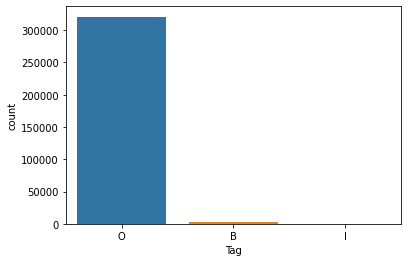

In [67]:
import seaborn as sns
sns.countplot(final_data['Tag'])

In [68]:
final_data['Tag'].value_counts()

O    320775
B      2303
I       312
Name: Tag, dtype: int64

In [70]:
#Replacing B with B-ORG since BERT by deafult has that Tags, similar for Inside Tag(I)
df=final_data
df.loc[(df['Tag'] == 'B'), 'Tag'] = 'B-ORG'
df.loc[(df['Tag'] == 'I'), 'Tag'] = 'I-ORG'
df.to_csv("BIO_taggingdata_ALL.csv",index=False)

In [32]:
data=pd.read_csv("tech_sort1k.csv")
data=data.drop(columns=["Note"])
data.head(10)
data['manually tagged']=data['exact_matched_patt_contextual']

data=data.drop(columns="exact_matched_patt_contextual")
data['manually tagged'] = [ [] if x is np.NaN else x for x in data['manually tagged'] ]


data.rename(columns={'summaries':'summary'}, inplace=True)
# data.head()

In [33]:


# newdf2 = data.append(data2, how="outer",on=['id','summary','manually tagged'])
newdf2 = pd.concat([data,data2])
newdf2=newdf2.drop_duplicates(subset='id', keep="last")
newdf2 = newdf2.reset_index(drop=True)

# for i, l in enumerate(newdf2["manually tagged"]):
#  print("list",i,"is",type(l))

In [34]:
newdf2['manually tagged'] = [ [] if x is np.NaN else x for x in newdf2['manually tagged'] ]
newdf2['manually tagged']=newdf2['manually tagged'].astype(str)

newdf2['manually tagged'] = newdf2['manually tagged'].apply(eval)

In [35]:
tech_dict = {}
for i in newdf2['manually tagged']:
    for j in i:
        if j not in tech_dict:
            tech_dict[j] = 1
        else:
            tech_dict[j] += 1

tech_list=[]
tech_multi_words=[]
for i in tech_dict:
    if ((' ' in i) == True):
        tech_multi_words.append(i)
    else:
        tech_list.append(i)

In [36]:
newdf2["summary"]=newdf2["summary"].apply(clean_text)

In [37]:
# final_data=pd.DataFrame()

# for i in range(0,len(data)):
#     temp = in_techwords(newdf2["summary"][i])
#     length = len(temp)
#     wordd="Sentence :"+str(i+1) #sentence no.
#     a=[wordd]*(length-1)
#     a.append(None)
#     temp.insert(0,"Sentence #",a)
#     final_data = final_data.append(temp, ignore_index=True) #appending sentences in the required format

In [38]:
final_data["Tag"].value_counts()

O        320775
B-ORG      2303
I-ORG       312
Name: Tag, dtype: int64

In [39]:
data_without_filter = final_data

In [40]:
final_data2=pd.DataFrame()

for i in range(0,len(data)):
    temp = BIO_conversion(newdf2["summary"][i])
    length = len(temp)
    wordd="Sentence :"+str(i+1) #sentence no.
    a=[wordd]*(length-1)
    a.append(None)
    temp.insert(0,"Sentence #",a)
#     if flag==True:
    final_data2 = final_data2.append(temp, ignore_index=True) #appending sentences in the required format

In [41]:
final_data2["Tag"].value_counts()

O    370577
B      4471
I       327
Name: Tag, dtype: int64

In [42]:
final_data2.to_csv("Manually_tagged_BIO.csv")